# Data Projekt 2 Team_xmisti00


# Load and Show data set
- [x] Load data set 


In [79]:
# Path: main.ipynb

''' for dirname, _, filenames in os.walk('./data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename)) '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from scipy import stats

pd.set_option('display.max_columns', None)

#data cleansing


In [80]:
df = pd.read_csv('./data/IT Salary Survey EU  2020.csv')
df

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0
1250,18/01/2021 23:20:35,39.0,Male,Munich,IT Operations Manager,15,2,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce,No,NaN,NaN
1251,19/01/2021 10:17:58,26.0,Male,Saarbrücken,Frontend Developer,7,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,German,101-1000,Product,No,NaN,0


# Data Exploration

### prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.)

In [81]:
#Size of row x columns
df.shape

(1253, 23)

In [82]:
# datatype of each column
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

- Timestamp                                                                                                                -   datum a čas záznamu
- Age                                                                                                                      -   pomerny
- Gender                                                                                                                   -   Symetric binary
- City                                                                                                                     -   Nominal
- Position                                                                                                                 -   Nominal
- Total years of experience                                                                                                -   Pomerovy
- Years of experience in Germany                                                                                           -   Pomerovy / odstranitelny
- Seniority level                                                                                                          -   ordinal
- Your main technology / programming language                                                                              -   nominal
- Other technologies/programming languages you use often                                                                   -   nominal
- Yearly brutto salary (without bonus and stocks) in EUR                                                                   -   pomerovy
- Yearly bonus + stocks in EUR                                                                                             -   nominal
- Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country                 -   pomerovy
- Annual bonus+stocks one year ago. Only answer if staying in same country                                                 -   nominal
- Number of vacation days                                                                                                  -   pomerovy
- Employment status                                                                                                        -   ordinal
- Сontract duration                                                                                                        -   pomerovy
- Main language at work                                                                                                    -   nominal
- Company size                                                                                                             -   ordinal
- Company type                                                                                                             -   ordinal
- Have you lost your job due to the coronavirus outbreak?                                                                  -   nominal / odstranitelny
- Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week                        -   pomerny
- Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR  -   pomerny

In [83]:
# find range of all columns for dataframe
df.describe()

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
count,1226.000000,1.253000e+03,8.850000e+02,373.000000
mean,32.509788,8.027904e+07,6.322459e+05,12.967828
std,5.663804,2.825061e+09,1.680508e+07,15.275174
min,20.000000,1.000100e+04,1.100000e+04,0.000000
25%,29.000000,5.880000e+04,5.500000e+04,0.000000
50%,32.000000,7.000000e+04,6.500000e+04,0.000000
75%,35.000000,8.000000e+04,7.500000e+04,30.000000
max,69.000000,1.000000e+11,5.000000e+08,40.000000


In [84]:
df.describe(exclude='number')

,Timestamp,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly bonus + stocks in EUR,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
count,1253,1243,1253,1247,1237,1221,1241,1126,1096,829,614,1185,1236,1224,1237,1235,1228,1233,462
unique,1248,3,119,148,48,53,24,256,562,168,131,45,11,3,14,5,63,10,59
top,24/11/2020 13:55:19,Male,Berlin,Software Engineer,10,2,Senior,Java,Javascript / Typescript,0,0,30,Full-time employee,Unlimited contract,English,1000+,Product,No,0
freq,2,1049,681,387,138,195,565,184,44,227,200,488,1190,1159,1020,448,760,1162,161


In [85]:
# geometric mean of some numerical columns
dfGeo = df.copy()
dfGeo.dropna(axis=0, inplace=True)
geometric_mean = stats.gmean(dfGeo.loc[:,('Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country')]).round(2)
print(geometric_mean)
geometric_mean = stats.gmean(dfGeo.loc[:,('Age')], axis=0).round(2)
print(geometric_mean)

63817.0
32.81


In [86]:
# harmonic mean of some numerical columns
harmonic_mean = stats.hmean(dfGeo.loc[:,('Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country')]).round(2)
print(harmonic_mean)
harmonic_mean = stats.hmean(dfGeo.loc[:,('Age')], axis=0).round(2)
harmonic_mean

59905.52


32.45

In [87]:
# dataframe std
df.std(numeric_only=True, axis=0, ddof=0)

Age                                                                                                         5.661494e+00
Yearly brutto salary (without bonus and stocks) in EUR                                                      2.823934e+09
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country    1.679558e+07
Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week           1.525468e+01
dtype: float64

In [88]:
# count values in all columns and show most used values descending
for col in df.columns:
    print(col)
    print(df[col].value_counts())
    print('--------------------------------------')

Timestamp
24/11/2020 13:55:19    2
25/11/2020 08:47:37    2
24/11/2020 15:07:35    2
25/11/2020 18:28:01    2
24/11/2020 14:07:23    2
                      ..
24/11/2020 20:26:58    1
24/11/2020 20:26:20    1
24/11/2020 20:26:19    1
24/11/2020 20:25:32    1
19/01/2021 12:01:11    1
Name: Timestamp, Length: 1248, dtype: int64
--------------------------------------
Age
30.0    110
33.0     94
32.0     94
28.0     87
31.0     87
29.0     86
35.0     82
34.0     74
36.0     60
26.0     59
27.0     58
38.0     48
37.0     44
25.0     42
40.0     31
24.0     28
39.0     28
42.0     20
41.0     14
23.0     12
45.0     11
43.0     10
22.0      8
44.0      8
46.0      8
48.0      4
47.0      3
56.0      2
49.0      2
54.0      2
66.0      1
53.0      1
65.0      1
59.0      1
50.0      1
51.0      1
21.0      1
20.0      1
69.0      1
52.0      1
Name: Age, dtype: int64
--------------------------------------
Gender
Male       1049
Female      192
Diverse       2
Name: Gender, dtype: int64
---

In [89]:
# show all numerical columns
df.mode(numeric_only=True)

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
0,30.0,60000.0,65000.0,0.0


## Rozlozeni hodnot

 prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.).

### Age of participants

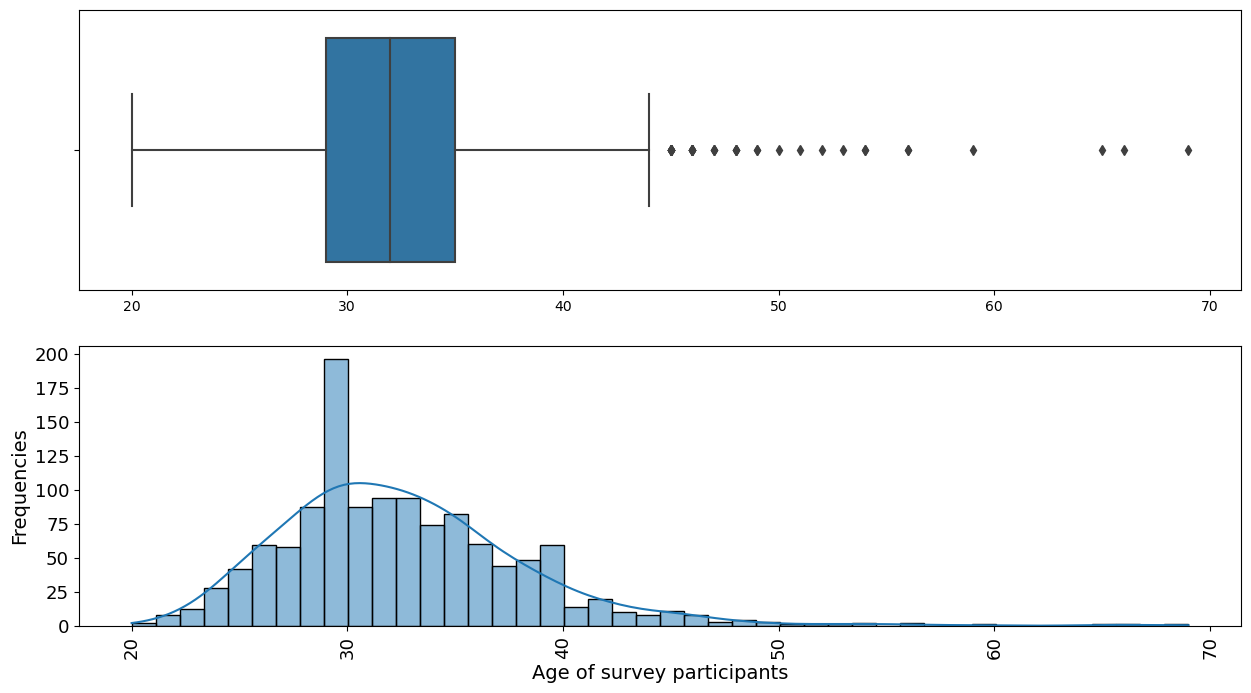

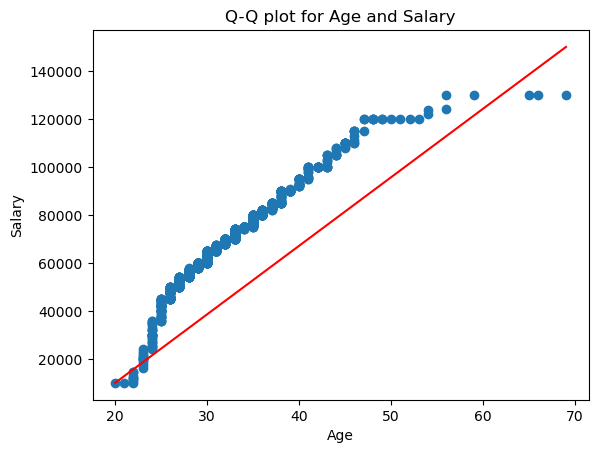

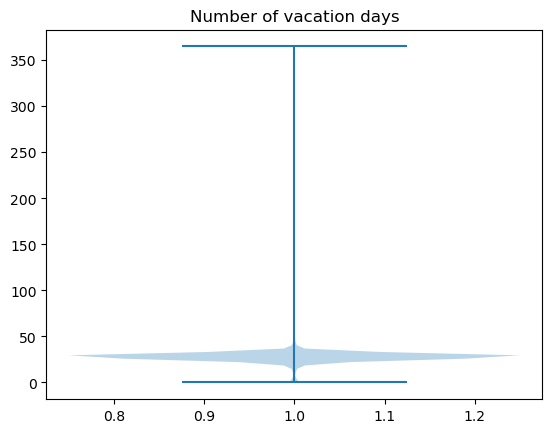

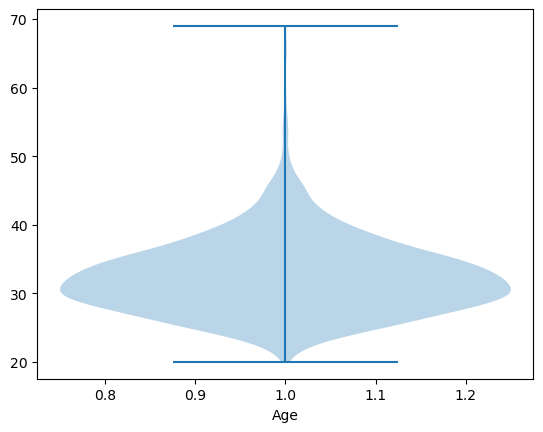

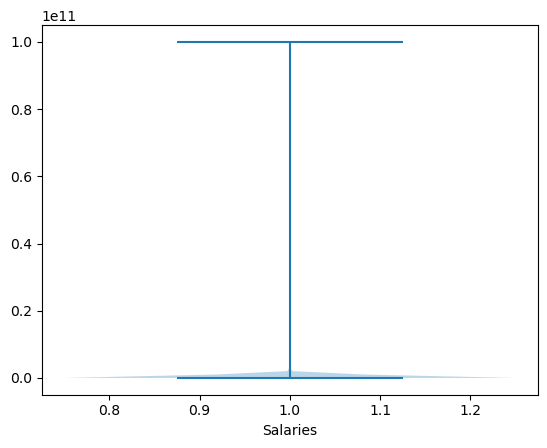

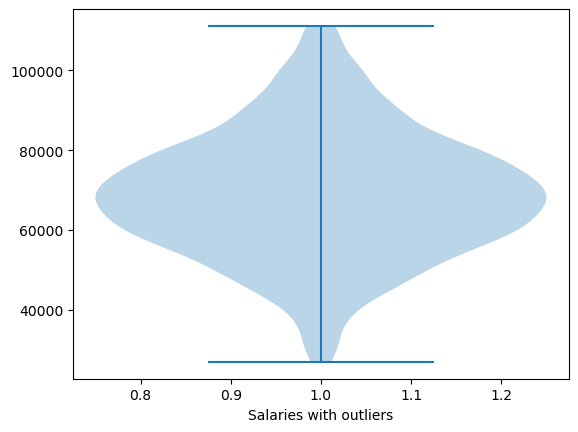

count      1173.000000
mean      69016.847511
std       15864.104213
min       27000.000000
25%       60000.000000
50%       69000.000000
75%       80000.000000
max      111111.000000
Name: Yearly brutto salary (without bonus and stocks) in EUR, dtype: float64

In [90]:
# Age
fig, (ax_box,ax_hist) = plt.subplots(2,figsize=(15,8))

sns.boxplot(data=df,x='Age',ax=ax_box)
ax_box.set(xlabel="")
sns.histplot(data=df,x='Age',kde=True,ax=ax_hist)


plt.xticks(fontsize=13,rotation=90)
plt.xlabel("Age of survey participants",fontsize=14)
plt.yticks(fontsize=13)
plt.ylabel("Frequencies",fontsize=14)
plt.show()
plt.close()
df['Age'].describe()

# create Q-Q plot for age and salary

plt.scatter(np.sort(df['Age']), np.sort(df['Yearly brutto salary (without bonus and stocks) in EUR']))
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Q-Q plot for Age and Salary')
# add the line y=x
x = np.array([df['Age'].min(), df['Age'].max()])
y = np.array([df['Yearly brutto salary (without bonus and stocks) in EUR'].min(),150000])
plt.plot(x, y, color='red')
plt.show()
plt.close()

# create violin graph for number of vacation days / must be changed to numeric

numberOfDays = df['Number of vacation days'].dropna()
numberOfDays = pd.to_numeric(numberOfDays.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)


plt.violinplot(numberOfDays)
plt.title('Number of vacation days')
plt.show()
plt.close()

plt.violinplot(df['Age'].dropna())
plt.xlabel('Age')
plt.show()
plt.close()

salaries = df['Yearly brutto salary (without bonus and stocks) in EUR'].dropna()
plt.violinplot(salaries)
plt.xlabel('Salaries')
plt.show()
plt.close()
# clear outliers

Q1 = salaries.quantile(0.25)
Q3 = salaries.quantile(0.75)
IQR = Q3 - Q1

salaries = salaries[~((salaries < (Q1 - 1.5 * IQR)) |(salaries > (Q3 + 1.5 * IQR)))]

plt.violinplot(salaries)
plt.xlabel('Salaries with outliers')
plt.show()
plt.close()

salaries.describe()


### proveďte korelační analýzu numerických atributů (k analýze využijte i grafy a korelační koeficienty).

In [91]:
# correlation matrix of numerical data from dataframe
df.corr(method='spearman')

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
Age,1.000000,0.331578,0.347417,0.016111
Yearly brutto salary (without bonus and stocks) in EUR,0.331578,1.000000,0.920552,-0.077135
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,0.347417,0.920552,1.000000,0.006897
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",0.016111,-0.077135,0.006897,1.000000


In [92]:
df.corr(method='kendall')

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
Age,1.000000,0.236848,0.247825,0.012667
Yearly brutto salary (without bonus and stocks) in EUR,0.236848,1.000000,0.789083,-0.058908
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,0.247825,0.789083,1.000000,0.007424
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",0.012667,-0.058908,0.007424,1.000000


In [93]:
df.corr(method='pearson')

,Age,Yearly brutto salary (without bonus and stocks) in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week"
Age,1.000000,-0.017259,-0.024847,-0.003563
Yearly brutto salary (without bonus and stocks) in EUR,-0.017259,1.000000,0.999998,-0.044144
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,-0.024847,0.999998,1.000000,-0.050298
"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",-0.003563,-0.044144,-0.050298,1.000000


0


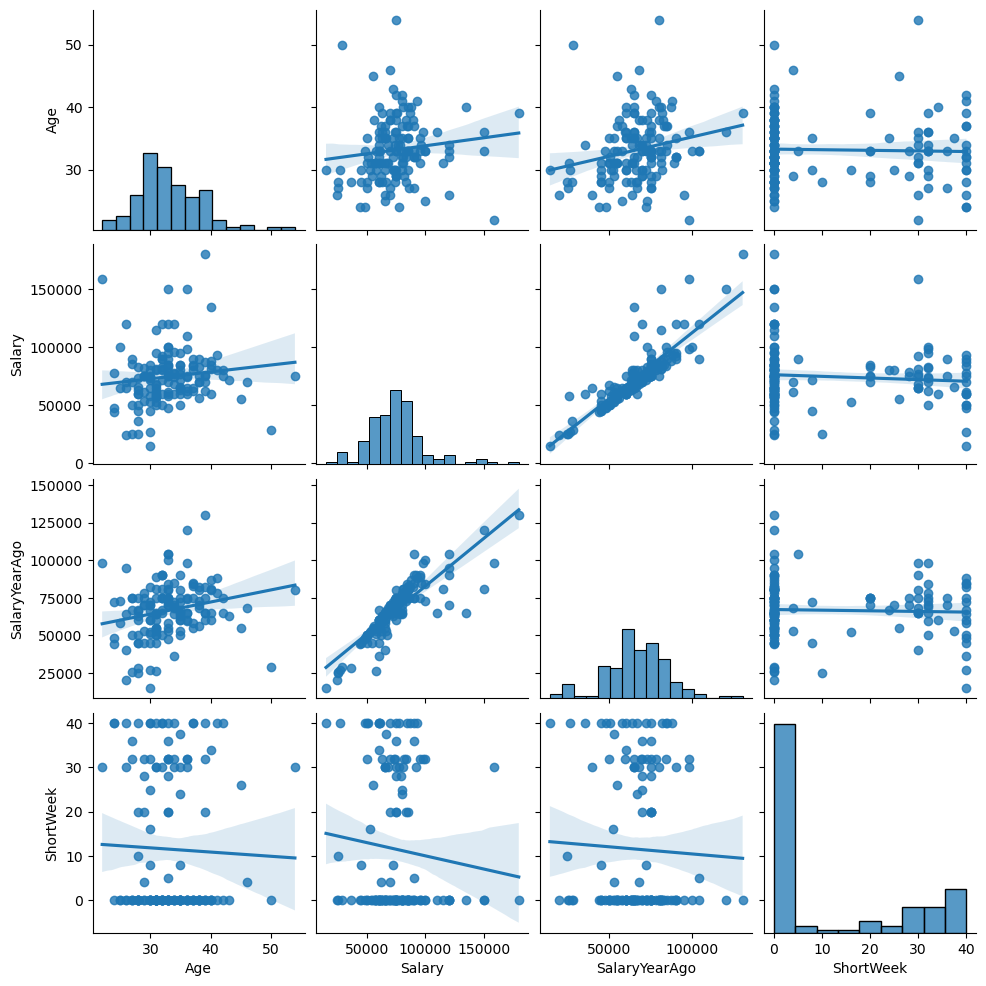

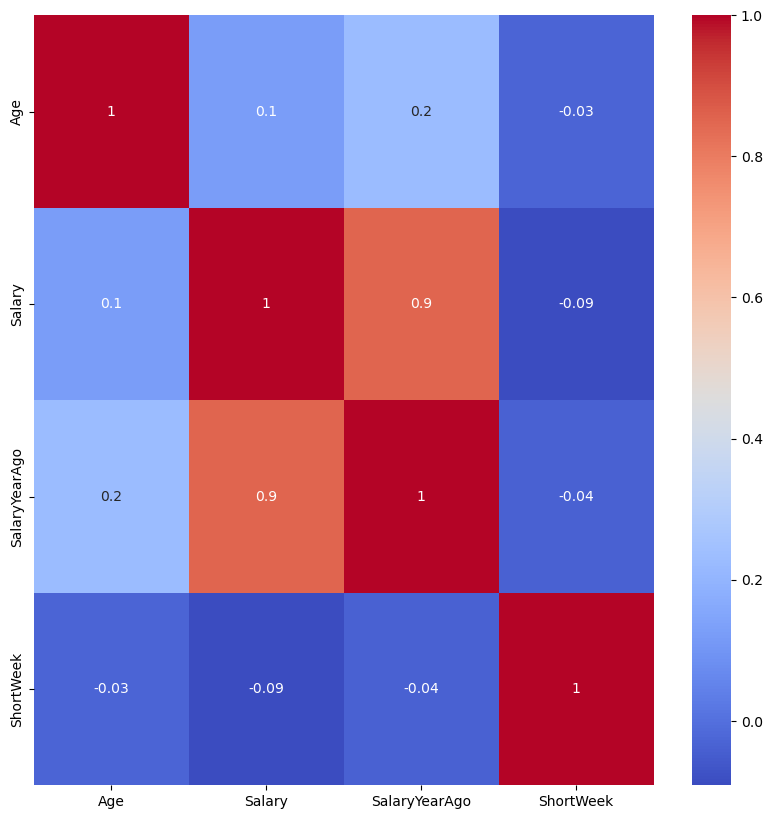

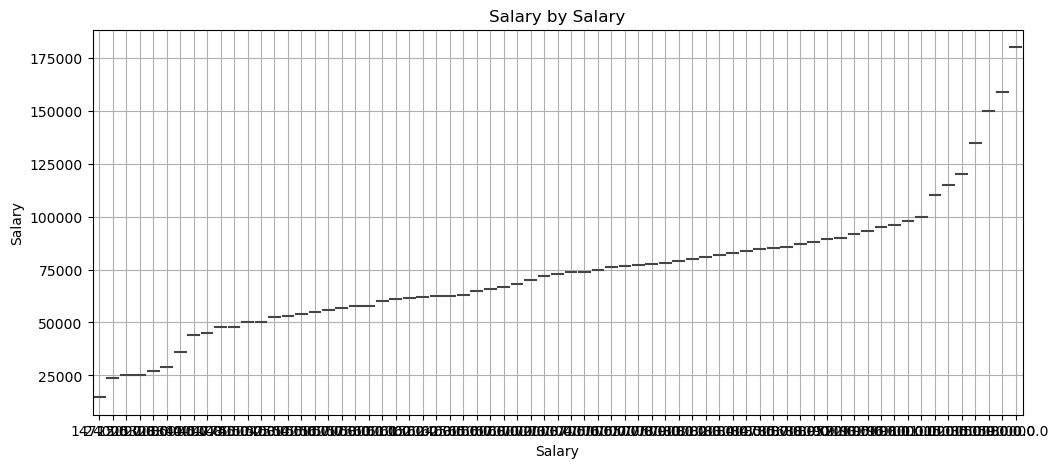

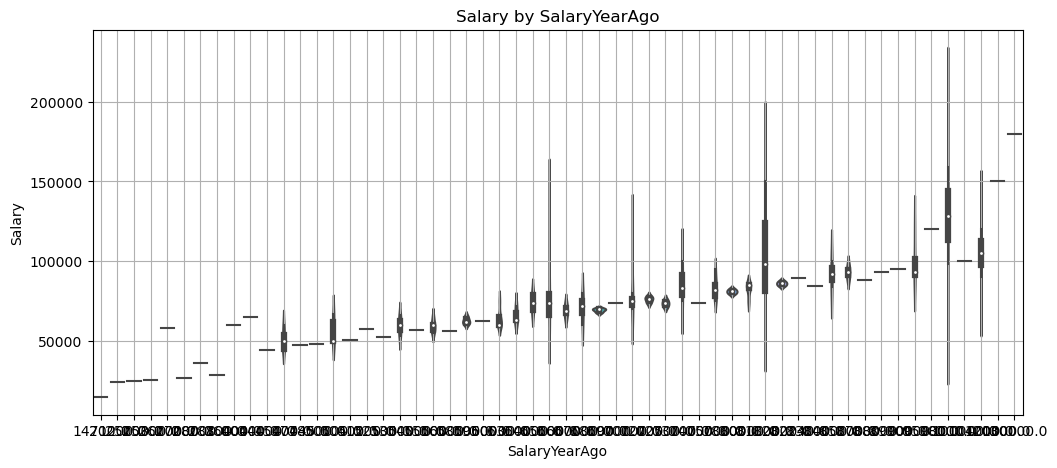

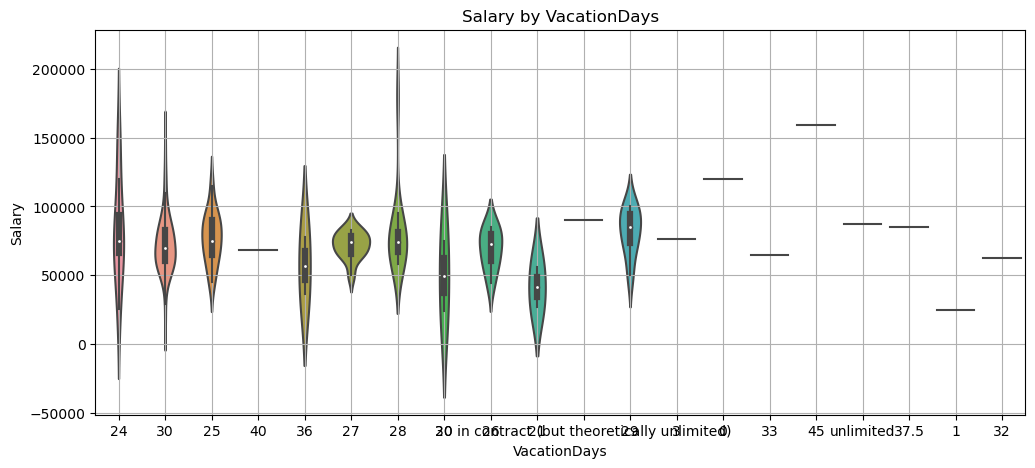

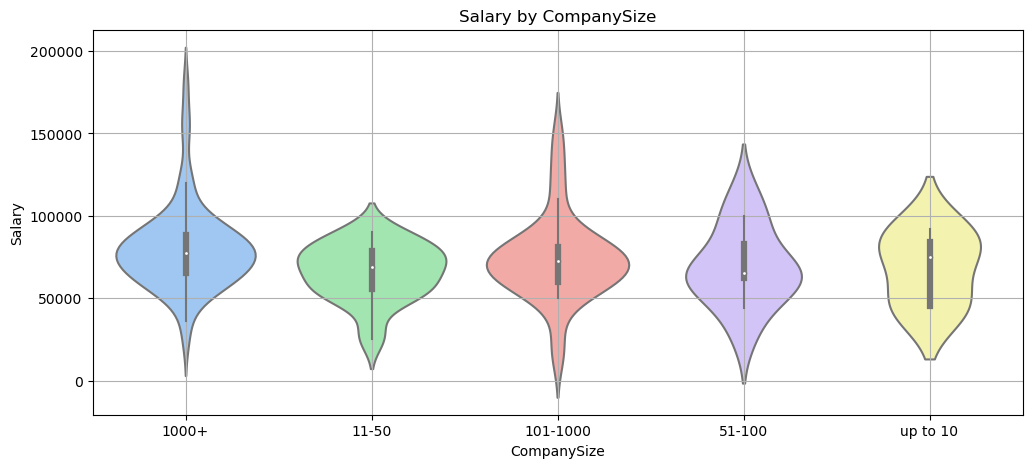

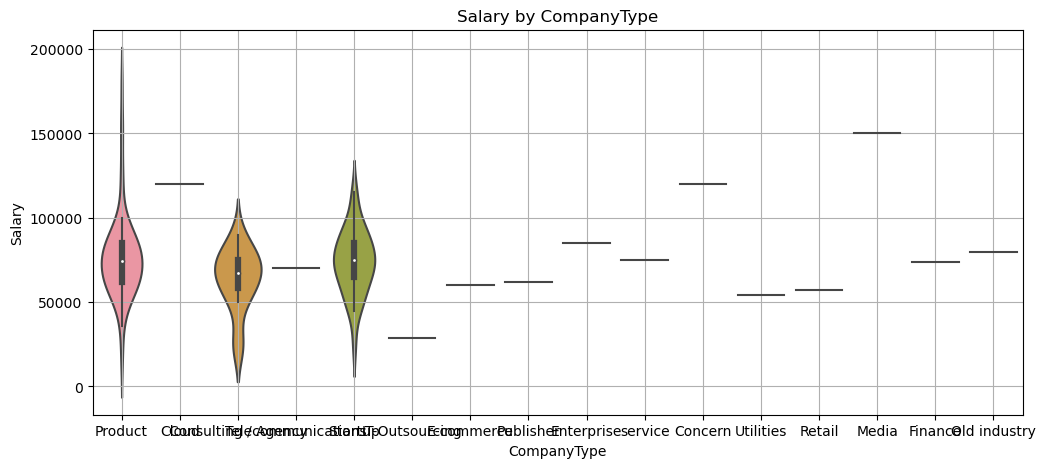

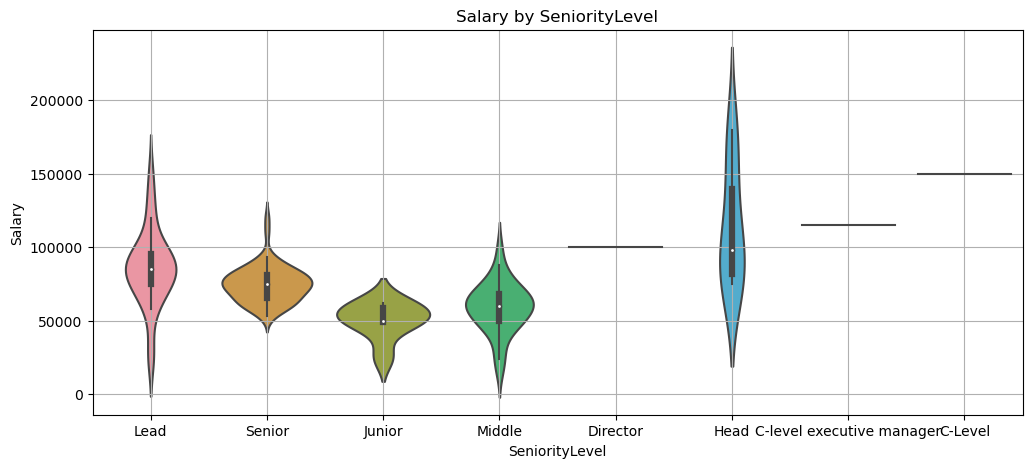

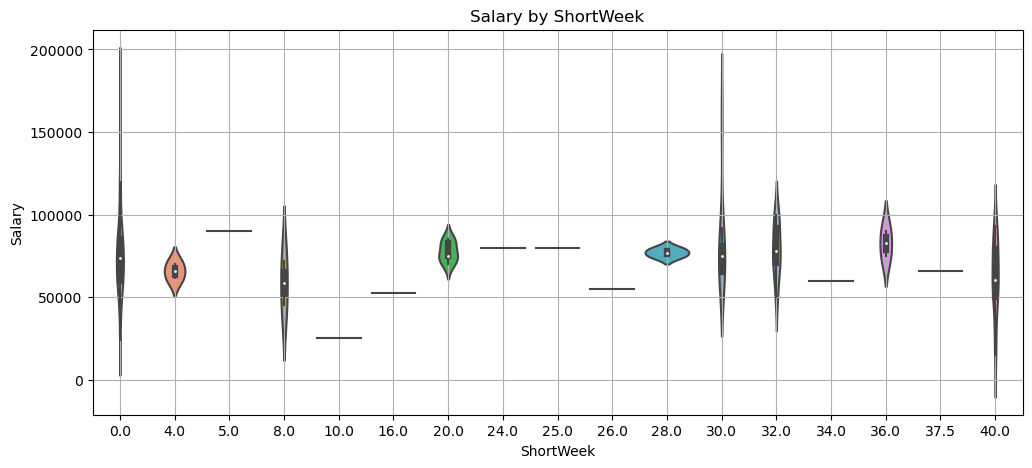

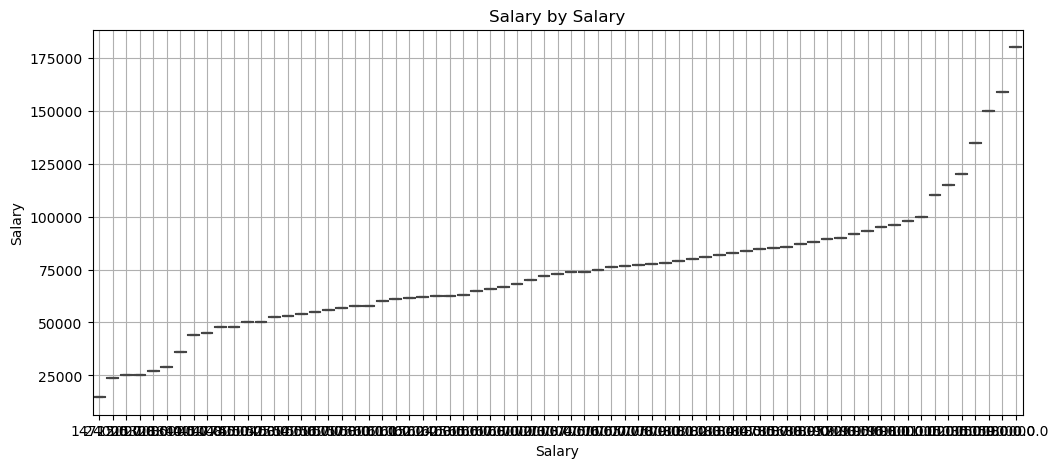

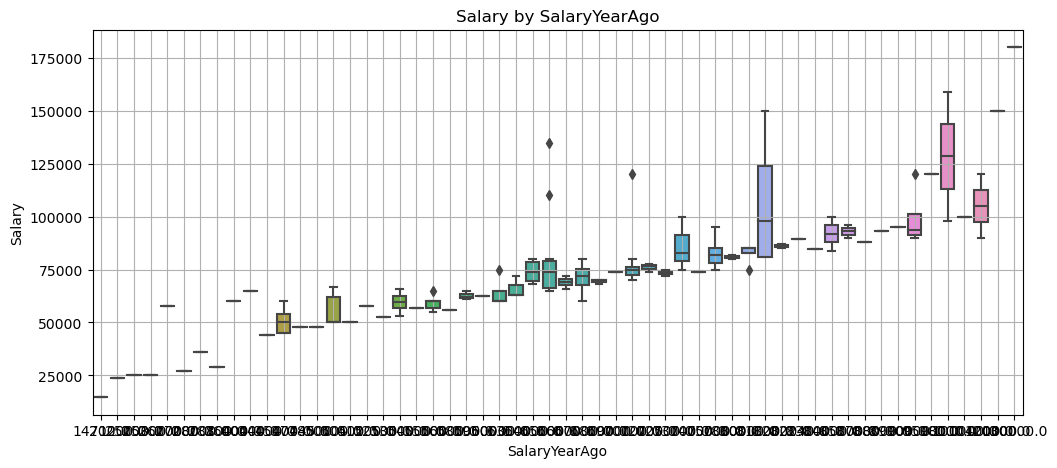

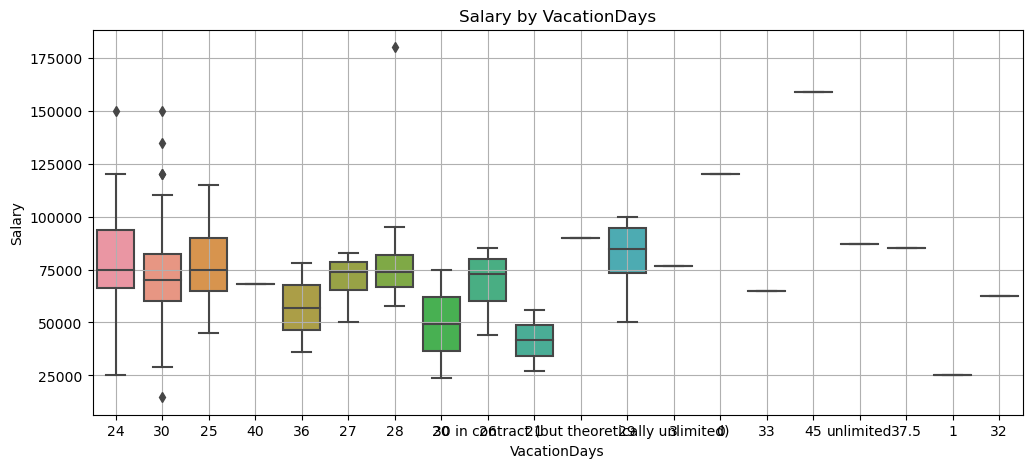

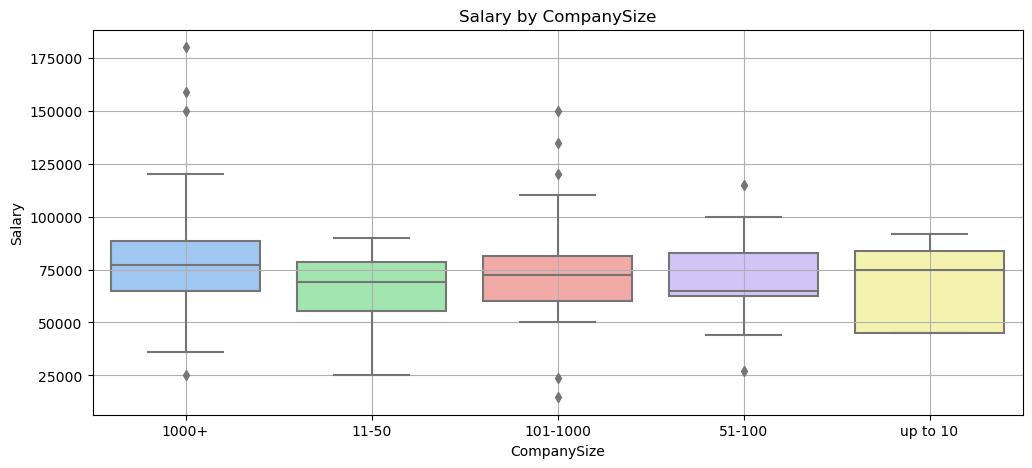

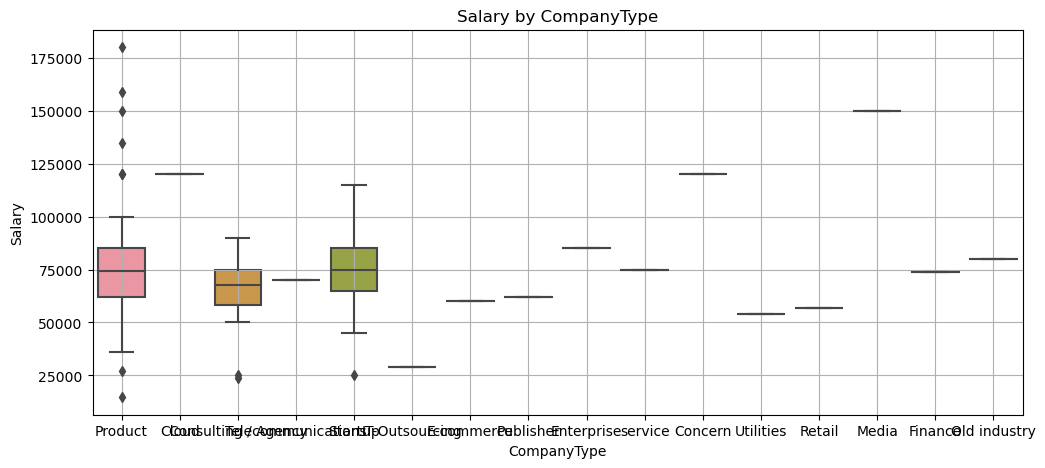

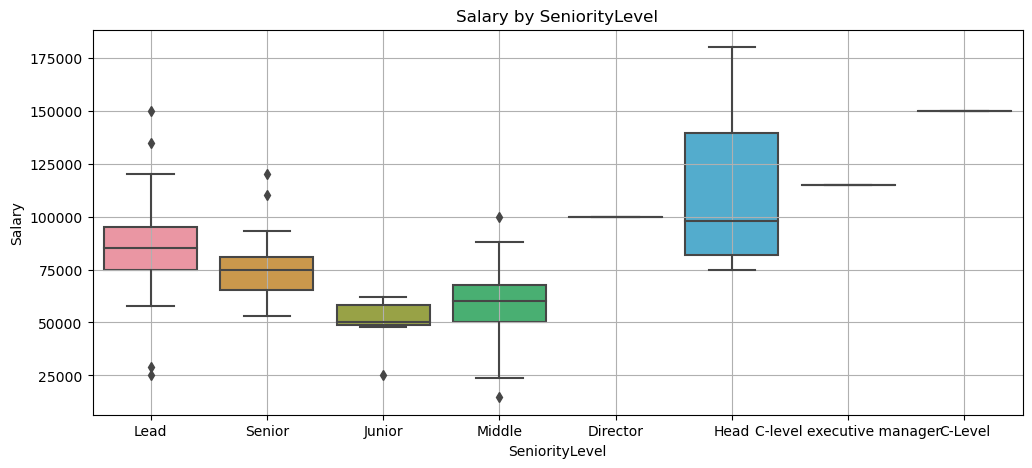

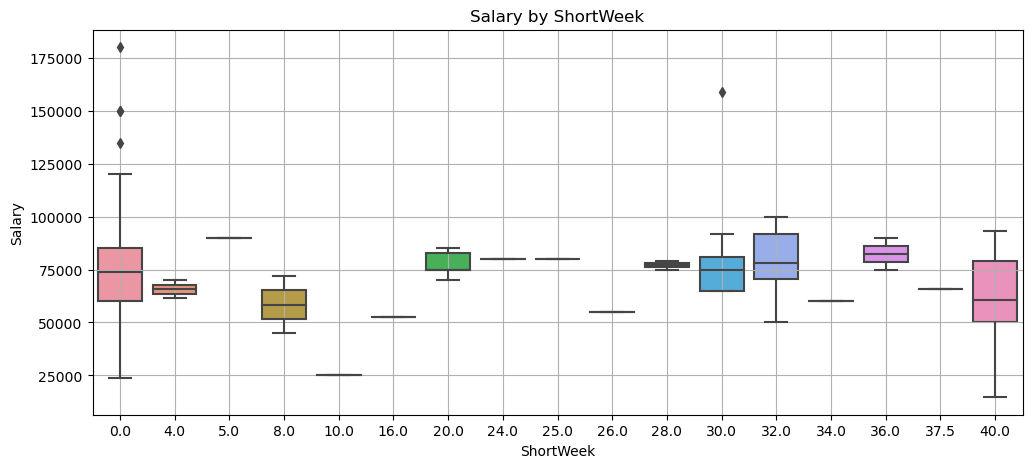

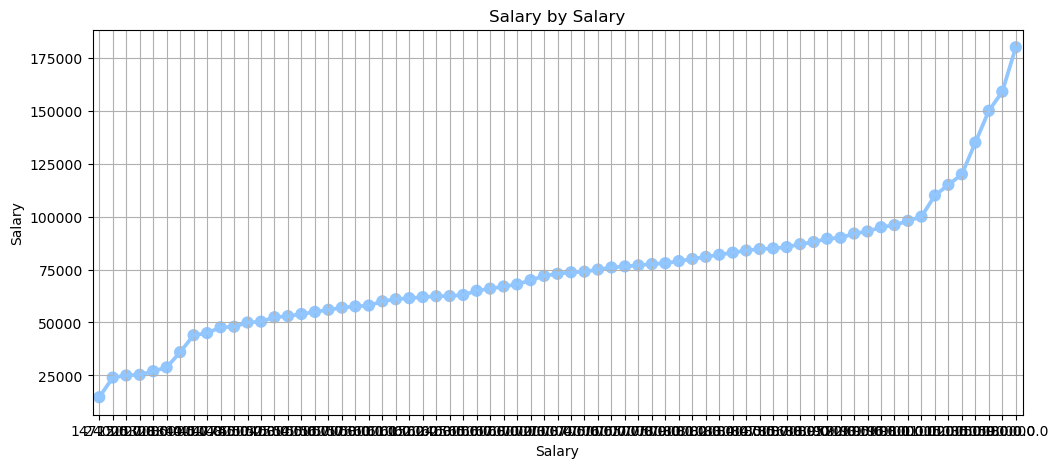

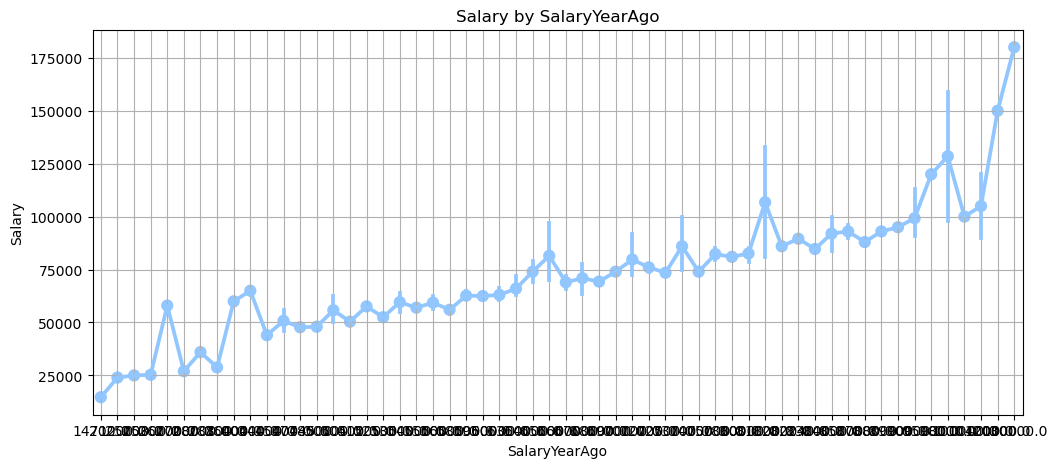

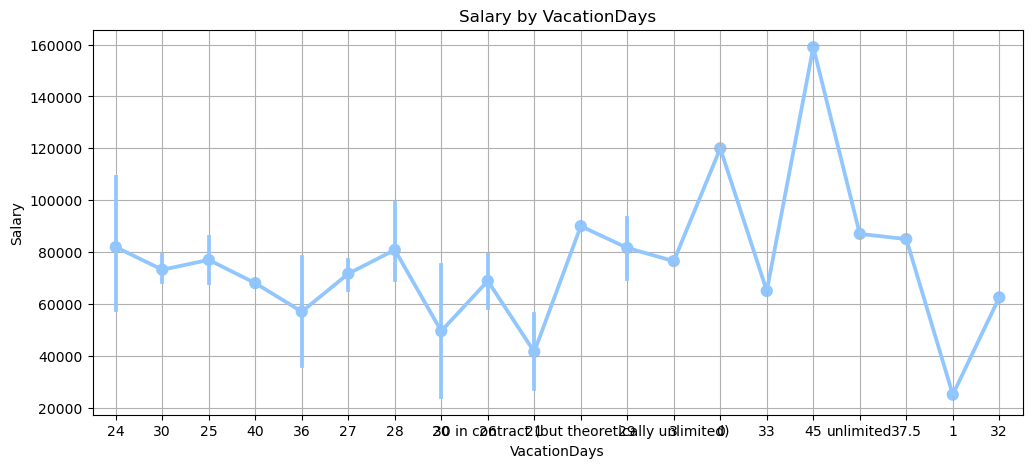

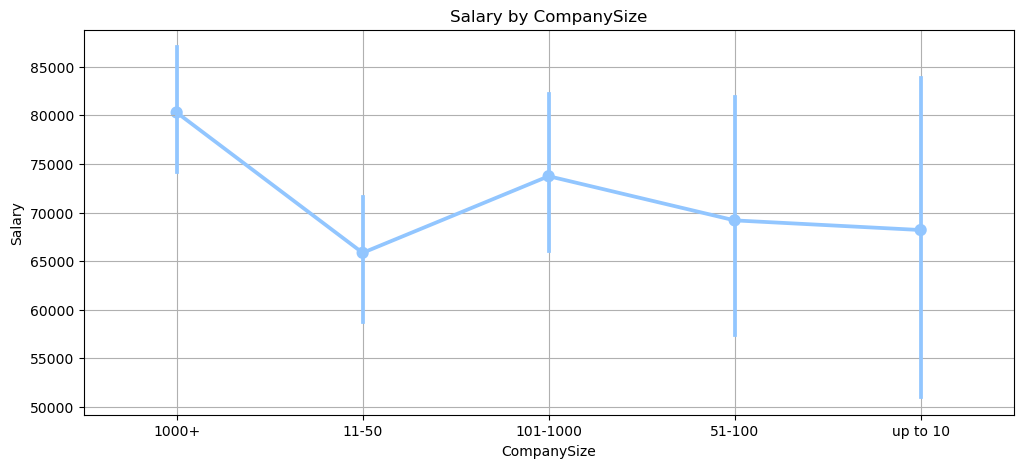

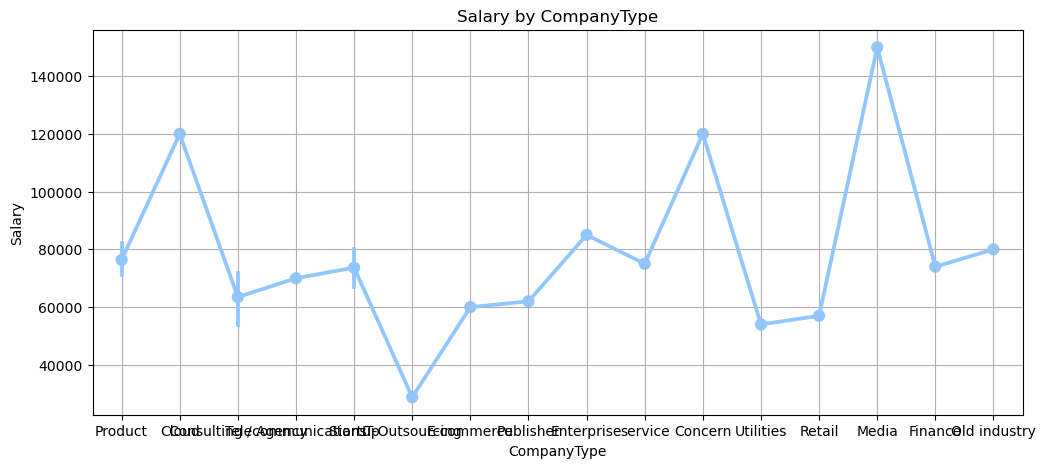

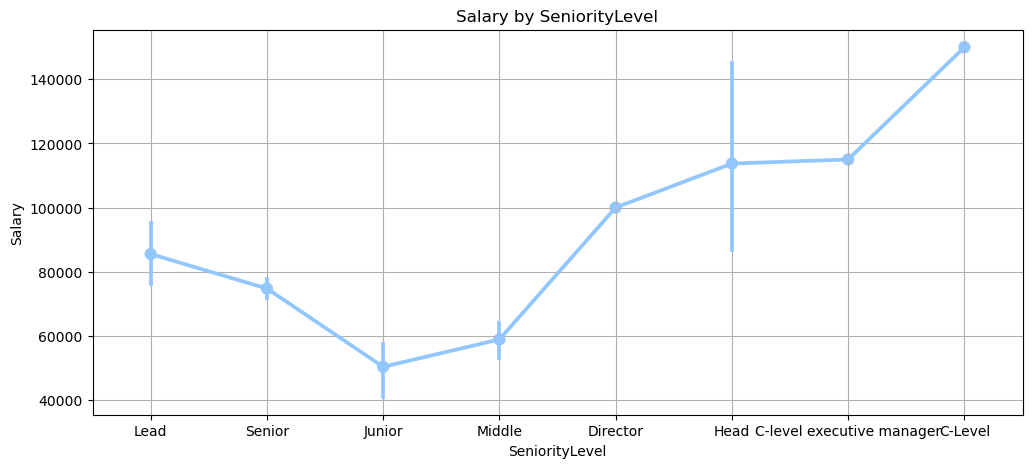

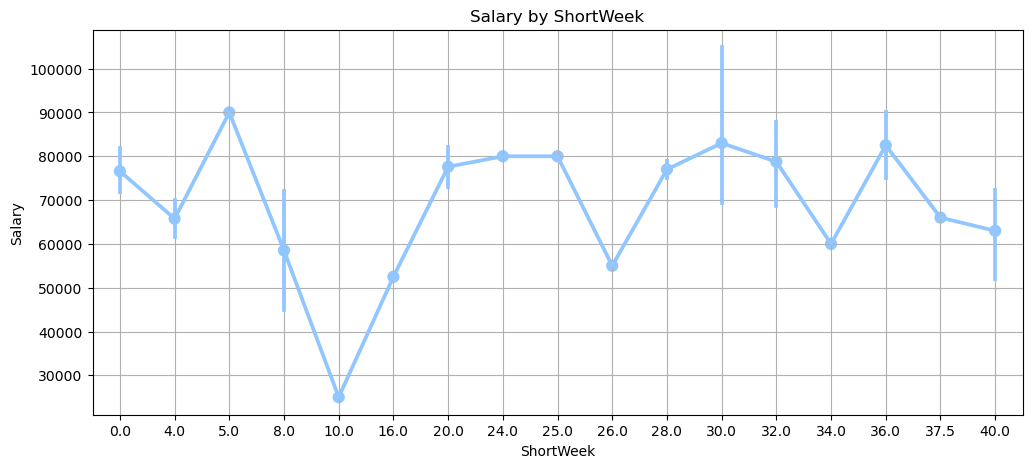

In [94]:
dfCorrelation = df.copy(deep=True)
# change name of columns
dfCorrelation.rename(columns={'Yearly brutto salary (without bonus and stocks) in EUR':'Salary'}, inplace=True)
dfCorrelation.rename(columns={'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country':'SalaryYearAgo'}, inplace=True)
dfCorrelation.rename(columns={'Number of vacation days':'VacationDays'}, inplace=True)
dfCorrelation.rename(columns={'Number of home office days per month':'HomeOfficeDays'}, inplace=True)
dfCorrelation.rename(columns={'Company size':'CompanySize'}, inplace=True)
dfCorrelation.rename(columns={'Company type':'CompanyType'}, inplace=True)
dfCorrelation.rename(columns={'Seniority level':'SeniorityLevel'}, inplace=True)
dfCorrelation.rename(columns={'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week':'ShortWeek'},inplace=True)
# correlation graphs for numerical data
dfCorrelation.dropna(axis=0, inplace=True)
print(dfCorrelation.isnull().sum().sum())
sns.pairplot(dfCorrelation, kind="reg")

plt.show()
plt.close()

# create heatmap for correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(dfCorrelation.corr(), annot=True, fmt='.1g', cmap='coolwarm')
plt.show()
plt.close()

# create correlation violin plots
my_features = ['Salary', 'SalaryYearAgo', 'VacationDays', 'CompanySize', 'CompanyType', 'SeniorityLevel', 'ShortWeek']

for f in my_features:
    plt.style.use('seaborn-pastel')
    plt.figure(figsize=(12,5))
    sns.violinplot(data=dfCorrelation, x=f, y='Salary')
    plt.grid()
    plt.title('Salary by ' + f)
    plt.show()

# create correlation box plots

for f in my_features:
    plt.style.use('seaborn-pastel')
    plt.figure(figsize=(12,5))
    sns.boxplot(data=dfCorrelation, x=f, y='Salary')
    plt.grid()
    plt.title('Salary by ' + f)
    plt.show()

# create point plots for categorical data

for f in my_features:
    plt.style.use('seaborn-pastel')
    plt.figure(figsize=(12,5))
    sns.pointplot(data=dfCorrelation, x=f, y='Salary')
    plt.grid()
    plt.title('Salary by ' + f)
    plt.show()

# Graphs commented out because of computational time
# uncomment to see graphs with shift + alt + a


### zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty.

In [95]:
dfremoval = df.copy()
''' dfremoval.dropna(axis=0, inplace=True) ''' # drop rows with NaN values
dfremoval.dropna(axis=1, inplace=True) # drop columns with NaN values
# remove outliers for every column
for column in dfremoval.columns:
    if dfremoval[column].dtype != 'object':
        Q1 = dfremoval[column].quantile(0.25)
        Q3 = dfremoval[column].quantile(0.75)
        IQR = Q3 - Q1
        dfremoval = dfremoval[~((dfremoval[column] < (Q1 - 1.5 * IQR)) |(dfremoval[column] > (Q3 + 1.5 * IQR)))]
print(dfremoval.shape)

print(dfremoval.isnull().sum().sum())
dfremoval.head(15)

(1173, 3)
0


,Timestamp,City,Yearly brutto salary (without bonus and stocks) in EUR
0,24/11/2020 11:14:15,Munich,80000.0
1,24/11/2020 11:14:16,Berlin,80000.0
3,24/11/2020 11:15:24,Berlin,54000.0
4,24/11/2020 11:15:46,Berlin,62000.0
5,24/11/2020 11:15:53,Berlin,76000.0
6,24/11/2020 11:16:35,Berlin,57000.0
7,24/11/2020 11:16:44,Berlin,65000.0
8,24/11/2020 11:17:24,Berlin,56000.0
9,24/11/2020 11:17:50,Berlin,95000.0
10,24/11/2020 11:18:06,Hamburg,52500.0


## proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).

In [96]:
# list columns with most NaN values
df.isnull().sum().sort_values(ascending=False)

Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week                          880
Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR    791
Annual bonus+stocks one year ago. Only answer if staying in same country                                                   639
Yearly bonus + stocks in EUR                                                                                               424
Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country                   368
Other technologies/programming languages you use often                                                                     157
Your main technology / programming language                                                                                127
Number of vacation days                                                                                        

### Pocet objektu s vice chybejicimi hodnotami

In [97]:
# list rows with more than one NaN values
df[df.isnull().sum(axis=1) > 1]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1246,18/01/2021 09:51:30,38.0,Male,Berlin,Head of Engineering,18,8,Head,NaN,"Javascript / Typescript, SQL, Go, AWS, Google ...",90000.0,20000,90000.0,20000,26,Full-time employee,Unlimited contract,German,51-100,Product,No,NaN,NaN
1247,18/01/2021 11:50:02,34.0,Male,Zurich,Software Engineer,7,2,Senior,PHP,PHP,108500.0,NaN,90000.0,NaN,25,Full-time employee,Unlimited contract,English,11-50,Startup,No,NaN,NaN
1248,18/01/2021 15:05:50,31.0,Male,Berlin,Backend Developer,9,5,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,English,51-100,Product,Yes,NaN,NaN
1249,18/01/2021 17:46:02,33.0,Male,Berlin,Researcher/ Consumer Insights Analyst,10,1.5,Senior,consumer analysis,NaN,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,English,1000+,Product,No,NaN,0


In [98]:
def is_number_in_std_of_df_length(df, number):
    return number > df.shape[0] - 3 * df.shape[0] / 4 and number < df.shape[0] + 3 * df.shape[0] / 4

def is_number_in_std_of_df_len(df, number):
    return (number > df.mean() - 3 * df.std()) and (number < df.mean() + 3 * df.std())    
# list rows with more than ten NaN values

print(df[df.isnull().sum(axis=1) > 10].any(axis=1).count() / len(df)*100, '% of the rows have more than 10 NaN values')
print('is value in standard deviations ?', is_number_in_std_of_df_length(df,df[df.isnull().sum(axis=1) > 10].any(axis=1).count()))
df[df.isnull().sum(axis=1) > 10]


1.1971268954509178 % of the rows have more than 10 NaN values
is value in standard deviations ? False


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
55,24/11/2020 11:33:08,NaN,Male,Berlin,Software Engineer,NaN,1,Senior,PHP,NaN,7.500000e+04,NaN,NaN,NaN,NaN,Full-time employee,NaN,English,NaN,NaN,No,0.0,NaN
281,24/11/2020 15:07:35,28.0,Male,Berlin,Frontend Developer,8,5,Senior,Javascript,NaN,6.800000e+04,NaN,NaN,NaN,NaN,Full-time employee,NaN,NaN,NaN,NaN,NaN,NaN,NaN
360,24/11/2020 18:16:39,25.0,Male,Berlin,Backend Developer,5,0,Senior,Java,Python,6.000000e+04,5600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
378,24/11/2020 18:50:50,30.0,Male,Samara,Backend Developer,2,0,Middle,php,"PHP, Javascript / Typescript, SQL",1.200000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
473,25/11/2020 03:27:34,NaN,NaN,Berlin,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
529,25/11/2020 10:58:13,NaN,Male,Berlin,Software Engineer,15,NaN,Senior,Java,NaN,1.500000e+05,150000,NaN,NaN,NaN,Full-time employee,NaN,English,NaN,NaN,No,NaN,NaN
678,25/11/2020 19:02:20,21.0,Female,Cologne,Mobile Developer,2,2,Middle,NaN,NaN,5.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,25/11/2020 21:10:17,37.0,Male,Stuttgart,Backend Developer,NaN,NaN,Senior,C#,NaN,7.000000e+04,NaN,NaN,NaN,30,Full-time employee,Unlimited contract,NaN,NaN,NaN,No,NaN,NaN
714,25/11/2020 23:20:02,32.0,Male,Paris,DevOps,12,3,Senior,NaN,NaN,6.200000e+04,NaN,NaN,NaN,NaN,Full-time employee,NaN,English,1000+,NaN,NaN,NaN,NaN
770,26/11/2020 14:37:05,27.0,Male,Bucharest,QA Engineer,1,0,Junior,Javascript,Javascript / Typescript,1.100000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
#rows with NaN values
counter = 0
for i in range(len(df.index)) :
    if df.iloc[i].isnull().sum() > 1 :
        counter += 1
counter

954

In [100]:
#pocet vsech NaN hodnot

df.isnull().sum().sum()


3682

# 3. Připravte 2 varianty datové sady vhodné pro dolovací algoritmy. Můžete uvažovat dolovací úlohu uvedenou u datové sady nebo navrhnout vlastní dolovací úlohy. V případě vlastní dolovací úlohy ji specifikujte v dokumentaci. V rámci přípravy datové sady proveďte následující kroky:

## Data Cleaning with autofill


In [101]:
# fill NaN values by backfill
dfAutofill = df.copy()
dfAutofill.fillna(method='backfill', downcast='infer', inplace=True)

dfAutofill.drop_duplicates()
print(dfAutofill.shape)

# show 5 rows of dataframe

dfAutofill.head(15)

(1253, 23)


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,0.0,600
1,24/11/2020 11:14:16,26,Male,Berlin,Backend Developer,7,4,Senior,Ruby,"Javascript / Typescript, Docker",80000.0,120000,82000,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,600
2,24/11/2020 11:14:21,29,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,0.0,600
3,24/11/2020 11:15:24,28,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,".NET, SQL, AWS, Docker",54000.0,5000,62000,5000,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,0.0,600
4,24/11/2020 11:15:46,37,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,5000,62000,5000,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,600
5,24/11/2020 11:15:53,32,Male,Berlin,DevOps,5,1,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,5000,76000,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup,No,0.0,600
6,24/11/2020 11:16:35,37,Male,Berlin,Frontend Developer,6,0.4,Middle,Javascript,Javascript / Typescript,57000.0,101,65000,13000,24,Full-time employee,Unlimited contract,English,11-50,Product,No,0.0,600
7,24/11/2020 11:16:44,24,Male,Berlin,Frontend Developer,5,1,Senior,Typescript,Javascript / Typescript,65000.0,101,65000,13000,27,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,600
8,24/11/2020 11:17:24,29,Male,Berlin,Backend Developer,8,2,Senior,PHP,"SQL, AWS, Docker",56000.0,101,55000,13000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,30.0,1000
9,24/11/2020 11:17:50,35,Male,Berlin,Software Engineer,15,3,Lead,Java,"Python, Kotlin, Javascript / Typescript, SQL, AWS",95000.0,101,90000,13000,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,1000


In [102]:
# cheching for NaN values DataFrame

print(dfAutofill.isnull().sum().sum())
df.isnull().sum().sum()

0


3682

In [103]:
dfAutofill = df.copy()
dfAutofill.fillna(dfAutofill.mode().iloc[0], inplace=True)
dfAutofill.head(15)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,0.0,0
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,Javascript / Typescript,80000.0,0,82000.0,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,0.0,0
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,Javascript / Typescript,54000.0,0,65000.0,0,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,0.0,0
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,0,62000.0,0,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0
5,24/11/2020 11:15:53,32.0,Male,Berlin,DevOps,5,1,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,5000,76000.0,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup,No,0.0,0
6,24/11/2020 11:16:35,37.0,Male,Berlin,Frontend Developer,6,0.4,Middle,Javascript,Javascript / Typescript,57000.0,0,65000.0,0,24,Full-time employee,Unlimited contract,English,11-50,Product,No,0.0,0
7,24/11/2020 11:16:44,24.0,Male,Berlin,Frontend Developer,5,1,Senior,Typescript,Javascript / Typescript,65000.0,0,65000.0,0,27,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,600
8,24/11/2020 11:17:24,29.0,Male,Berlin,Backend Developer,8,2,Senior,PHP,"SQL, AWS, Docker",56000.0,0,55000.0,0,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,30.0,0
9,24/11/2020 11:17:50,35.0,Male,Berlin,Software Engineer,15,3,Lead,Java,Javascript / Typescript,95000.0,0,90000.0,0,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0


In [104]:
dfAutofill.isnull().sum().sum()

0

## Dataclean for droping NaN values

In [105]:
# drop columns with too many NaN values
dfAutofill = df.copy()
#dfAutofill.dropna(axis=1, inplace=True)
dfAutofill.dropna(axis=0, inplace=True)

print(dfAutofill.isnull().sum().sum())
dfAutofill.head(15)


0


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
35,24/11/2020 11:28:14,33.0,Male,Berlin,Data Scientist,5,4,Lead,Python,"Python, R, Google Cloud, Docker",150000.0,80000,81000.0,4000,24,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,1
141,24/11/2020 12:09:03,34.0,Male,Munich,Cloud Architect,10,4,Senior,"Azure, SAP","SAP / ABAP, AWS, Google Cloud, Azure, Kubernet...",120000.0,40000,70000.0,30000,30,Full-time employee,Unlimited contract,English,1000+,Cloud,No,0.0,1000
221,24/11/2020 13:33:08,32.0,Male,Stuttgart,QA Engineer,9,9,Senior,Java,"R, SQL, Perl, Docker",60000.0,4700,67000.0,5000,30,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency,No,40.0,50
225,24/11/2020 13:37:57,24.0,Male,Boeblingen,C/C++/Java developer,0.8,0.8,Junior,Java,C/C++,48000.0,101,48000.0,101,30,Full-time employee,Unlimited contract,English,11-50,Product,No,40.0,250
276,24/11/2020 14:58:11,38.0,Male,Munich,Backend Developer,12,12,Senior,Java,"PHP, Javascript / Typescript, SQL",70000.0,1500,68000.0,1500,30,Full-time employee,Unlimited contract,German,101-1000,Telecommunications,No,0.0,675
289,24/11/2020 15:22:10,32.0,Male,Berlin,Software Engineer,9,5,Lead,JavaScript,"Javascript / Typescript, Ruby, AWS, Kubernetes...",90000.0,0,75000.0,0,25,Full-time employee,Unlimited contract,English,101-1000,Product,Have been a freelancer at the beginning of year,0.0,No
290,24/11/2020 15:27:01,41.0,Male,Munich,Backend Developer,21,3,Senior,Java,"Kubernetes, Docker",80000.0,0,78000.0,0,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0
302,24/11/2020 15:59:02,30.0,Male,Berlin,Backend Developer,7,2,Senior,Ruby,"Javascript / Typescript, SQL, Go, AWS, Docker",72000.0,0,66000.0,0,25,Full-time employee,Unlimited contract,English,11-50,Product,No,0.0,0
306,24/11/2020 16:05:55,34.0,Male,Berlin,Frontend Developer,10,3,Senior,"Angular, React","Python, Javascript / Typescript, Docker",68000.0,0,68000.0,0,40,Full-time employee,Unlimited contract,English,11-50,Startup,No,30.0,0
307,24/11/2020 16:06:53,34.0,Male,Berlin,Software Engineer,12,2,Lead,.net,"Javascript / Typescript, .NET, SQL, Azure",78000.0,8000,64000.0,70000,36,Full-time employee,Unlimited contract,German,1000+,Product,No,0.0,0


## Vypořádejte se s odlehlými hodnotami, jsou-li v datové sadě přítomny.
### Outliers removal

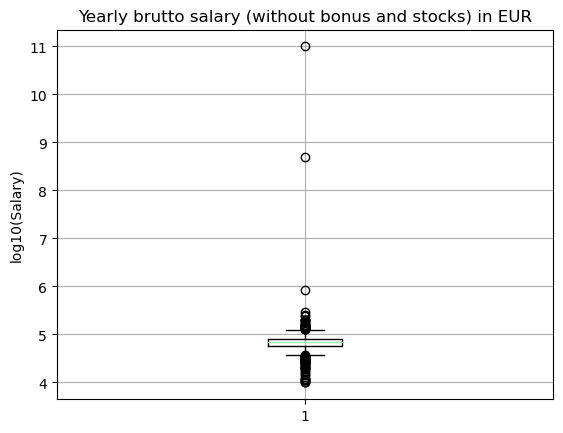

(1173, 23)


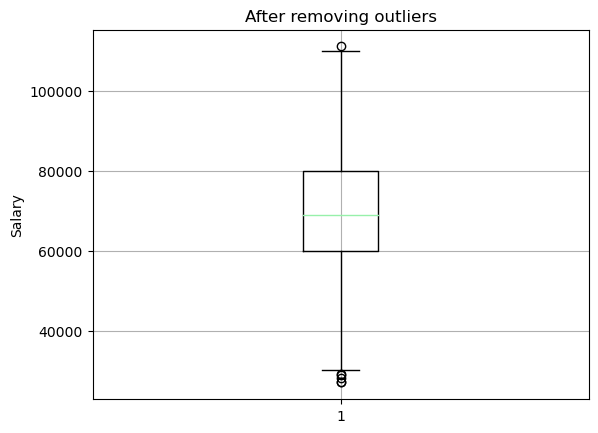

In [106]:
dfIQRRemoval = df.copy()

# check for outliers
plt.boxplot(np.log10(dfIQRRemoval['Yearly brutto salary (without bonus and stocks) in EUR']))
plt.title('Yearly brutto salary (without bonus and stocks) in EUR')
plt.ylabel('log10(Salary)')
plt.grid()
plt.show()

# IQR for salary

Q1 = dfIQRRemoval['Yearly brutto salary (without bonus and stocks) in EUR'].quantile(0.25)
Q3 = dfIQRRemoval['Yearly brutto salary (without bonus and stocks) in EUR'].quantile(0.75)
IQR = Q3 - Q1

# remove outliers

dfIQRRemoval = dfIQRRemoval[~((dfIQRRemoval['Yearly brutto salary (without bonus and stocks) in EUR'] < (Q1 - 1.5 * IQR)) |(dfIQRRemoval['Yearly brutto salary (without bonus and stocks) in EUR'] > (Q3 + 1.5 * IQR)))]
print(dfIQRRemoval.shape)


plt.boxplot(dfIQRRemoval['Yearly brutto salary (without bonus and stocks) in EUR'])
plt.title('After removing outliers')
plt.ylabel('Salary')
plt.grid()
plt.show()


In [107]:
# outliers removal for every column

dfremoval = df.copy()
dfremoval.dropna(axis=0, inplace=True) # drop rows with NaN values
''' dfremoval.dropna(axis=1, inplace=True) ''' # drop columns with NaN values
# remove outliers for every column
for column in dfremoval.columns:
    if dfremoval[column].dtype != 'object':
        Q1 = dfremoval[column].quantile(0.25)
        Q3 = dfremoval[column].quantile(0.75)
        IQR = Q3 - Q1
        dfremoval = dfremoval[~((dfremoval[column] < (Q1 - 1.5 * IQR)) |(dfremoval[column] > (Q3 + 1.5 * IQR)))]
print(dfremoval.shape)

print(dfremoval.isnull().sum().sum())
dfremoval.head(15)

(131, 23)
0


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
141,24/11/2020 12:09:03,34.0,Male,Munich,Cloud Architect,10,4,Senior,"Azure, SAP","SAP / ABAP, AWS, Google Cloud, Azure, Kubernet...",120000.0,40000,70000.0,30000,30,Full-time employee,Unlimited contract,English,1000+,Cloud,No,0.0,1000
221,24/11/2020 13:33:08,32.0,Male,Stuttgart,QA Engineer,9,9,Senior,Java,"R, SQL, Perl, Docker",60000.0,4700,67000.0,5000,30,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency,No,40.0,50
225,24/11/2020 13:37:57,24.0,Male,Boeblingen,C/C++/Java developer,0.8,0.8,Junior,Java,C/C++,48000.0,101,48000.0,101,30,Full-time employee,Unlimited contract,English,11-50,Product,No,40.0,250
276,24/11/2020 14:58:11,38.0,Male,Munich,Backend Developer,12,12,Senior,Java,"PHP, Javascript / Typescript, SQL",70000.0,1500,68000.0,1500,30,Full-time employee,Unlimited contract,German,101-1000,Telecommunications,No,0.0,675
289,24/11/2020 15:22:10,32.0,Male,Berlin,Software Engineer,9,5,Lead,JavaScript,"Javascript / Typescript, Ruby, AWS, Kubernetes...",90000.0,0,75000.0,0,25,Full-time employee,Unlimited contract,English,101-1000,Product,Have been a freelancer at the beginning of year,0.0,No
290,24/11/2020 15:27:01,41.0,Male,Munich,Backend Developer,21,3,Senior,Java,"Kubernetes, Docker",80000.0,0,78000.0,0,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0
302,24/11/2020 15:59:02,30.0,Male,Berlin,Backend Developer,7,2,Senior,Ruby,"Javascript / Typescript, SQL, Go, AWS, Docker",72000.0,0,66000.0,0,25,Full-time employee,Unlimited contract,English,11-50,Product,No,0.0,0
306,24/11/2020 16:05:55,34.0,Male,Berlin,Frontend Developer,10,3,Senior,"Angular, React","Python, Javascript / Typescript, Docker",68000.0,0,68000.0,0,40,Full-time employee,Unlimited contract,English,11-50,Startup,No,30.0,0
307,24/11/2020 16:06:53,34.0,Male,Berlin,Software Engineer,12,2,Lead,.net,"Javascript / Typescript, .NET, SQL, Azure",78000.0,8000,64000.0,70000,36,Full-time employee,Unlimited contract,German,1000+,Product,No,0.0,0
309,24/11/2020 16:15:34,38.0,Male,Berlin,Software Engineer,13,6,Lead,Java,Kotlin,89570.0,20240,82240.0,18000,30,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,500


### outliers removal of DFZscore

In [108]:
# z-score for outliers removal

dfzscore = df.copy()
dfzscore.dropna(axis=0, inplace=True) # drop rows with NaN values
''' dfzscore.dropna(axis=1, inplace=True) ''' # drop columns with NaN values
# zscore for every column
for column in dfzscore.columns:
    if dfzscore[column].dtype != 'object':
        dfzscore = dfzscore[(np.abs(stats.zscore(dfzscore[column])) < 3)]
print(dfzscore.shape)

print(dfzscore.isnull().sum().sum())
dfzscore.head(15)

# z-score for outliers removal

(137, 23)
0


,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
141,24/11/2020 12:09:03,34.0,Male,Munich,Cloud Architect,10,4,Senior,"Azure, SAP","SAP / ABAP, AWS, Google Cloud, Azure, Kubernet...",120000.0,40000,70000.0,30000,30,Full-time employee,Unlimited contract,English,1000+,Cloud,No,0.0,1000
221,24/11/2020 13:33:08,32.0,Male,Stuttgart,QA Engineer,9,9,Senior,Java,"R, SQL, Perl, Docker",60000.0,4700,67000.0,5000,30,Full-time employee,Unlimited contract,German,1000+,Consulting / Agency,No,40.0,50
225,24/11/2020 13:37:57,24.0,Male,Boeblingen,C/C++/Java developer,0.8,0.8,Junior,Java,C/C++,48000.0,101,48000.0,101,30,Full-time employee,Unlimited contract,English,11-50,Product,No,40.0,250
276,24/11/2020 14:58:11,38.0,Male,Munich,Backend Developer,12,12,Senior,Java,"PHP, Javascript / Typescript, SQL",70000.0,1500,68000.0,1500,30,Full-time employee,Unlimited contract,German,101-1000,Telecommunications,No,0.0,675
289,24/11/2020 15:22:10,32.0,Male,Berlin,Software Engineer,9,5,Lead,JavaScript,"Javascript / Typescript, Ruby, AWS, Kubernetes...",90000.0,0,75000.0,0,25,Full-time employee,Unlimited contract,English,101-1000,Product,Have been a freelancer at the beginning of year,0.0,No
290,24/11/2020 15:27:01,41.0,Male,Munich,Backend Developer,21,3,Senior,Java,"Kubernetes, Docker",80000.0,0,78000.0,0,30,Full-time employee,Unlimited contract,English,101-1000,Product,No,0.0,0
302,24/11/2020 15:59:02,30.0,Male,Berlin,Backend Developer,7,2,Senior,Ruby,"Javascript / Typescript, SQL, Go, AWS, Docker",72000.0,0,66000.0,0,25,Full-time employee,Unlimited contract,English,11-50,Product,No,0.0,0
306,24/11/2020 16:05:55,34.0,Male,Berlin,Frontend Developer,10,3,Senior,"Angular, React","Python, Javascript / Typescript, Docker",68000.0,0,68000.0,0,40,Full-time employee,Unlimited contract,English,11-50,Startup,No,30.0,0
307,24/11/2020 16:06:53,34.0,Male,Berlin,Software Engineer,12,2,Lead,.net,"Javascript / Typescript, .NET, SQL, Azure",78000.0,8000,64000.0,70000,36,Full-time employee,Unlimited contract,German,1000+,Product,No,0.0,0
309,24/11/2020 16:15:34,38.0,Male,Berlin,Software Engineer,13,6,Lead,Java,Kotlin,89570.0,20240,82240.0,18000,30,Full-time employee,Unlimited contract,English,1000+,Product,No,0.0,500


## Odstraňte z datové sady atributy, které jsou pro danou dolovací úlohu irelevantní.


In [109]:
# remove irrelevant columns in dataframe
dfIrrelevant = df.copy()
dfIrrelevant.drop(['Timestamp','Other technologies/programming languages you use often','Have you lost your job due to the coronavirus outbreak?',
'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR',
'Main language at work','Years of experience in Germany','Gender'], axis=1, inplace=True)
dfIrrelevant

# TODO drop values based on correlation

,Age,City,Position,Total years of experience,Seniority level,Your main technology / programming language,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Company size,Company type
0,26.0,Munich,Software Engineer,5,Senior,TypeScript,80000.0,5000,75000.0,10000,30,Full-time employee,Unlimited contract,51-100,Product
1,26.0,Berlin,Backend Developer,7,Senior,Ruby,80000.0,NaN,82000.0,5000,28,Full-time employee,Unlimited contract,101-1000,Product
2,29.0,Berlin,Software Engineer,12,Lead,Javascript / Typescript,120000.0,120000,100000.0,100000,30,Self-employed (freelancer),Temporary contract,101-1000,Product
3,28.0,Berlin,Frontend Developer,4,Junior,Javascript,54000.0,NaN,NaN,NaN,24,Full-time employee,Unlimited contract,51-100,Startup
4,37.0,Berlin,Backend Developer,17,Senior,C# .NET,62000.0,NaN,62000.0,NaN,29,Full-time employee,Unlimited contract,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1248,31.0,Berlin,Backend Developer,9,Senior,Java,70000.0,72000,70000.0,72000,26,Full-time employee,Unlimited contract,51-100,Product
1249,33.0,Berlin,Researcher/ Consumer Insights Analyst,10,Senior,consumer analysis,60000.0,3000,48000.0,2500,unlimited,Full-time employee,Unlimited contract,1000+,Product
1250,39.0,Munich,IT Operations Manager,15,Lead,PHP,110000.0,0,90000.0,NaN,28,Full-time employee,Unlimited contract,101-1000,eCommerce
1251,26.0,Saarbrücken,Frontend Developer,7,Middle,JavaScript,38350.0,40950,33800.0,36400,27,Full-time employee,Unlimited contract,101-1000,Product


## Convert Data

In [110]:
# convert to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
print(df['Timestamp'].head(5))

0   2020-11-24 11:14:15
1   2020-11-24 11:14:16
2   2020-11-24 11:14:21
3   2020-11-24 11:15:24
4   2020-11-24 11:15:46
Name: Timestamp, dtype: datetime64[ns]


In [111]:
# convert nominal to ordinal


